<a href="https://colab.research.google.com/github/sujalkumeriya59/Machine-Learning/blob/main/Bonus_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after cleaning:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      2
dtype: int64

Correlation matrix:
          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


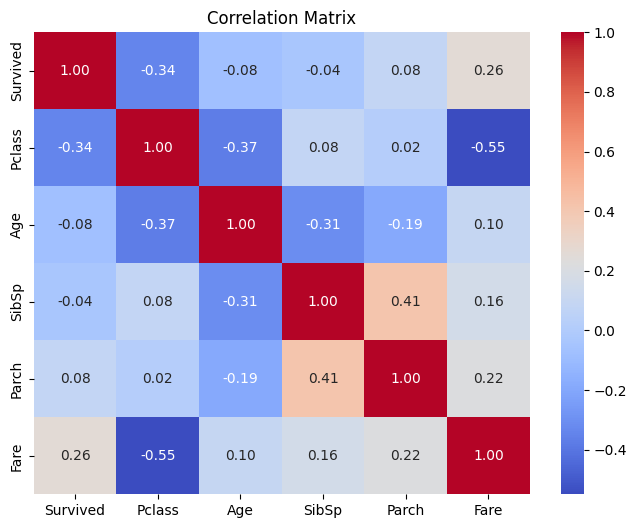

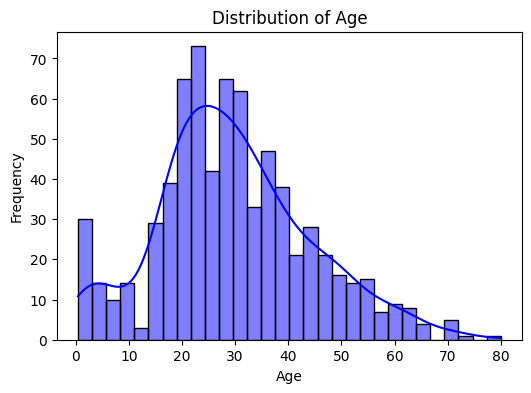

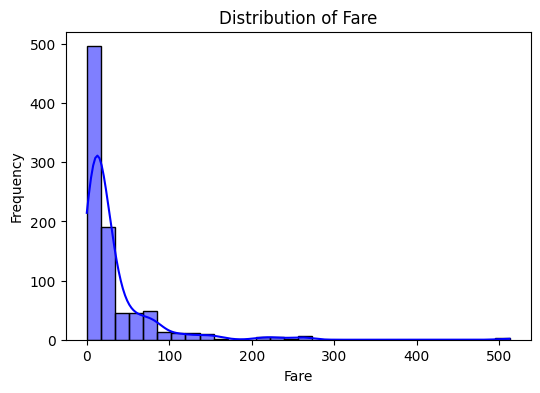

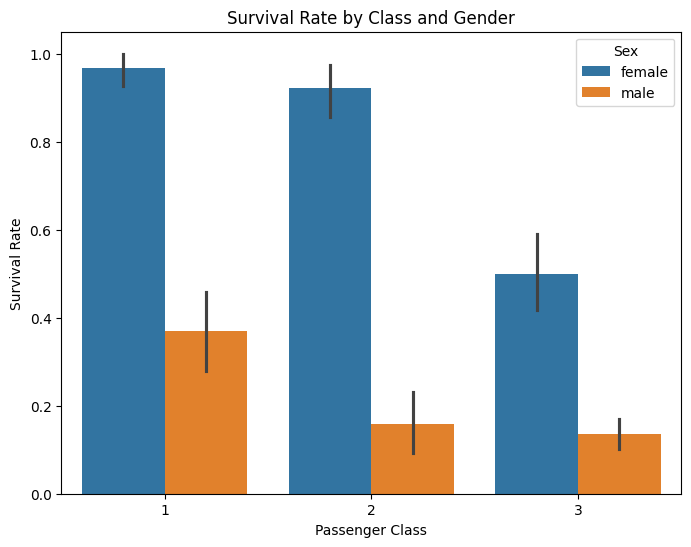


Cleaned data has been exported to 'titanic_cleaned.csv'.


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (Ensure the Titanic dataset CSV file is in the working directory)
data = pd.read_csv('/Titanic-Dataset.csv')

# 1. Data Cleaning
# Check for missing values
print("Missing values before cleaning:")
print(data.isnull().sum())

# Fill missing values
data['Age'].fillna(data['Age'].median())  # Fill missing ages with the median
data['Embarked'].fillna(data['Embarked'].mode()[0])  # Fill missing embarkation with the mode
data['Cabin'] = data['Cabin'].fillna('Unknown')  # Fill missing cabins with 'Unknown'

# Drop columns with too many missing values or unnecessary information
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Verify missing values after cleaning
print("\nMissing values after cleaning:")
print(data.isnull().sum())

# 2. Exploratory Data Analysis (EDA)

# Correlation matrix
# Include only numerical features for correlation calculation
numerical_features = data.select_dtypes(include=np.number).columns
correlation_matrix = data[numerical_features].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Visualize the distribution of numerical columns
numerical_columns = ['Age', 'Fare']
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Survival rate by class and gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data)
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

# 3. Export the cleaned dataset
data.to_csv('titanic_cleaned.csv', index=False)
print("\nCleaned data has been exported to 'titanic_cleaned.csv'.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')